<h1> 2019 Supermarket Sales</h1>

<img src ="Newssupermarket.jpg">

## Due to the growth in competitive markets in the city, an undisclosed company needs to identify product lines that have the highest profit and sales.

### Based on the performance in Q1 of 2019, how can the company increase sales based on the gross income and quantity purchased for the 6 product lines? 

ATTRIBUTES
<blockquote> 
    <ul>Invoice id: Computer generated sales slip invoice identification number</ul>
<ul>Branch: Branch of supercenter (3 branches are available identified by A, B and C).</ul>
<ul>City: Location of supercenters</ul>
<ul>Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.</ul>
<ul>Gender: Gender type of customer</ul>
<ul>Product line: General item categorization groups — Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel</ul>
<ul>Unit price: Price of each product in US Dollars</ul>
<ul>Quantity: Number of products purchased by customer </ul>
<ul>Tax: 5% tax fee for customer buying</ul>
<ul>Total: Total price including tax</ul>
<ul>Date: Date of purchase (January 2019 to March 2019)</ul>
<ul>Time: Purchase time (10am to 9pm)</ul>
<ul>Payment: Payment used by customer for purchase (Cash, Credit card and Ewallet)</ul>
<ul>COGS: Cost of goods sold</ul>
<ul>Gross margin percentage: Gross margin percentage</ul>
<ul>Gross income: Gross income</ul>
<ul>Rating: Customer stratification rating on their overall shopping experience (scale of 1-10)</ul>
</blockquote>

In [201]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [204]:
#Import dataframes
df= pd.read_csv("supermarket_sales.csv")

In [205]:
#Print describe
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [206]:
#Print head 
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [207]:
#Print information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [211]:
#convert date and time from object to datetime series
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df['Date'].dtype
type(df['Date'])
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['Hour'] = (df['Time']).dt.hour 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [212]:
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

                 Time      Payment    cogs  gross margin percentage  \
0 2021-11-22 13:08:00      Ewallet  522.83                 4.761905   
1 2021-11-22 10:29:00         Cash   76.40                

## Market Concentration

<code>Which Product Line is the most popular?<code>

In [213]:
product_line = df['Product line'].value_counts()
print(product_line)

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


<code>What is the percentage of popularity for each Product Line?<code>

In [214]:
percent = df['Product line'].value_counts(normalize=True)
print(percent)

Fashion accessories       0.178
Food and beverages        0.174
Electronic accessories    0.170
Sports and travel         0.166
Home and lifestyle        0.160
Health and beauty         0.152
Name: Product line, dtype: float64


<code> Which Product Line is most popular by Gender? <code>

Text(0.5, 1.0, 'Product Line by Gender')

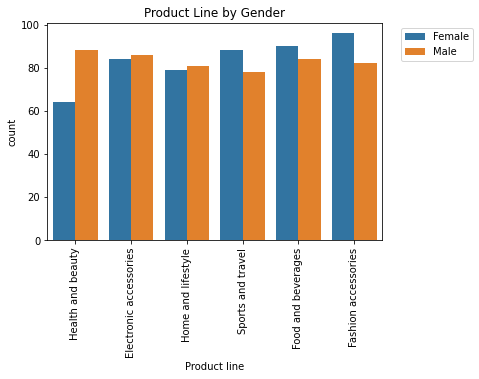

In [263]:
ax =sns.countplot(x='Product line', hue='Gender', data=df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Product Line by Gender")

<code>Which Product Line is the most popular for each Customer Type? <code>

Text(0.5, 1.0, 'Product Line by Customer Type')

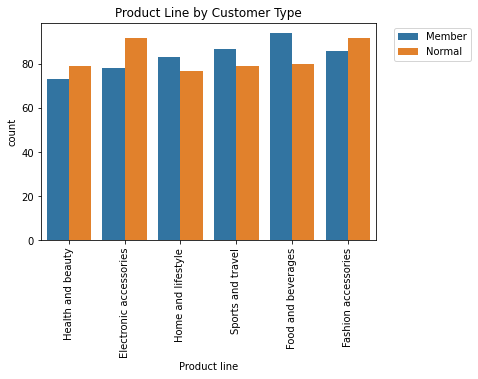

In [259]:
ax =sns.countplot(x='Product line', hue='Customer type', data=df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Product Line by Customer Type")

<blockquote> 
    <ul>
        <li>Customers are most interested in Fashion accessories; typically non-member and women.</li>
        <li>In contrast, the least popular item is Health and beauty; typically members and women.</li>
    </ul> 
</blockquote>

## Market Revenue

<code>Which Product Line has the highest average gross income?<code>

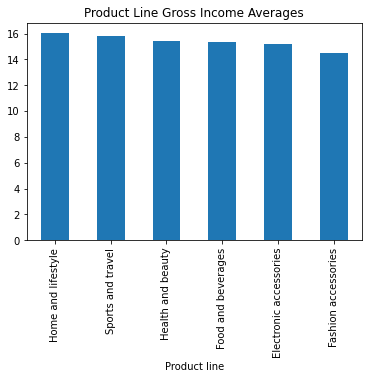

In [217]:
product_gi = df.groupby('Product line').mean()['gross income'].sort_values(ascending=False)
product_gi.plot(kind="bar")
plt.title("Product Line Gross Income Averages")
plt.show()

<code>Which Branch has the highest average gross income?<code>

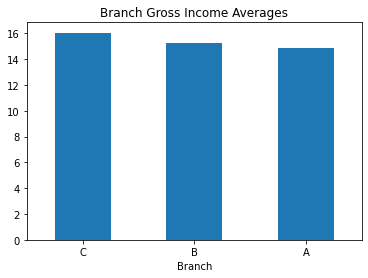

In [218]:
branch_gi = df.groupby('Branch').mean()['gross income'].sort_values(ascending=False)
branch_gi.plot(kind="bar")
plt.title("Branch Gross Income Averages")
plt.xticks(rotation=0)
plt.show()

<code> What is the Gross Income by Month?<code>

Text(0.5, 1.0, 'Gross Income per Month')

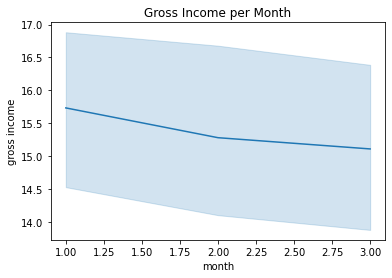

In [226]:
sns.lineplot(x="month",  y = 'gross income', data=df).set_title("Gross Income per Month")

<code> Which membership type brings in the highest revenue?<code>

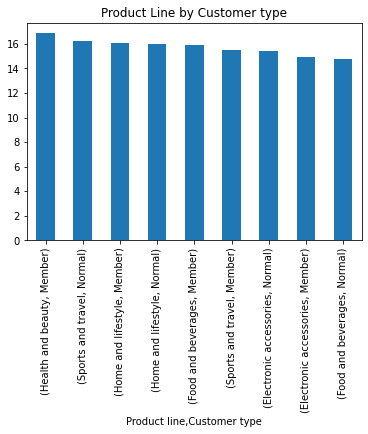

In [264]:
ct_group = df.loc[(df['Product line'] == 'Fashion accessories') | (df['Product line'] == "Sports and travel") | 
                  (df['Product line'] == 'Food and beverages') |(df['Product line'] == 'Home and lifestyle') | 
                  (df['Product line'] == 'Health and beauty') | (df['Product line'] == 'Electronic accessories')]

ct_group.groupby(['Product line', 'Customer type']).mean().sort_values(by=['gross income'], ascending=False)['gross income'].head(9).plot(kind='bar')
plt.title("Product Line by Customer type")
plt.show()

<code> Which Gender brings in the highest revenue?<code>

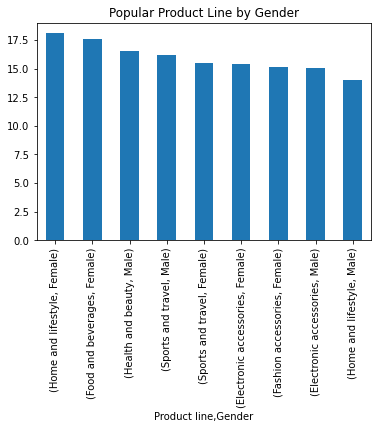

In [265]:
pl_group = df.loc[(df['Product line'] == 'Fashion accessories') | (df['Product line'] == "Sports and travel") | 
                  (df['Product line'] == 'Food and beverages') |(df['Product line'] == 'Home and lifestyle') | 
                  (df['Product line'] == 'Health and beauty') | (df['Product line'] == 'Electronic accessories')]

pl_group.groupby(['Product line', 'Gender']).mean().sort_values(by=['gross income'], ascending=False)['gross income'].head(9).plot(kind='bar')
plt.title("Popular Product Line by Gender")
plt.show()


<blockquote> 
    <ul>
        <li>Home and lifestyle product line has the highest average gross income, while Fashion accessories has the lowest gross income. To increase the revenue for Home and lifestyle, create campaigns targeting men as women outspend men. </li>
        <li>Branch C has the highest average gross income, while Branch A has the lowest.</li>
        <li>January 2019 brought in the highest gross income and steadily declined over Q1.</li>
        <li>Health and beauty memberships, typically from men, bring in the most revenue.</li>
    </ul> 
</blockquote>

## Payment Channel

<code>Which Payment Channel is most popular for each Product Line? <code>

Text(0.5, 1.0, 'Payment Channel by Product Line')

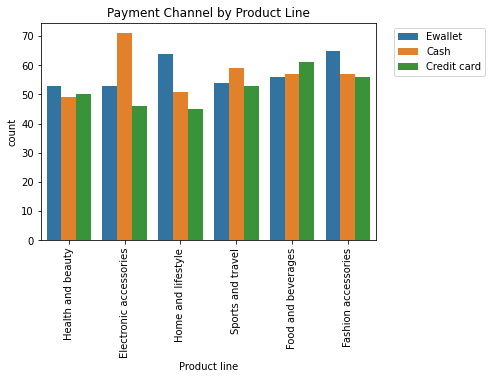

In [219]:
ax =sns.countplot(x='Product line', hue='Payment', data=df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Payment Channel by Product Line")

In [270]:
product_line = df['Payment'].value_counts()
print(product_line)

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


<blockquote> 
    <ul>
        <li> Customers are utilizing relatively the same amount of payment options. The company should continue to offer a variety of payment options to reduce wait time, eliminate hassle for customers, and make the company appear more attractive.</li>
    </ul> 
</blockquote>

## Market Expenditures

<code>Which Product Line has the highest COGS?<code>

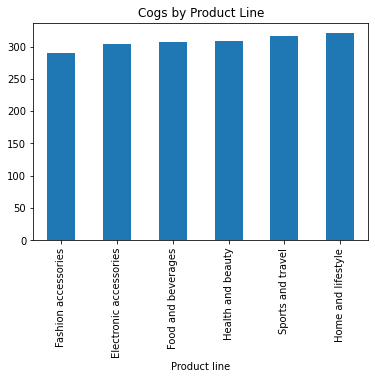

In [220]:
rev = df.groupby('Product line').mean()['cogs'].sort_values(ascending=True)
rev.plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Cogs by Product Line")
plt.show()

<code>Which Branch has the highest COGS?<code>

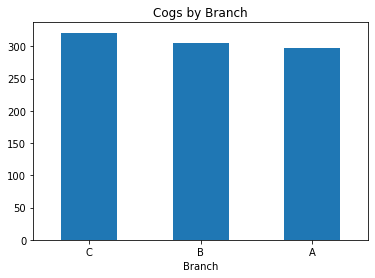

In [221]:
rev = df.groupby('Branch').mean()['cogs'].sort_values(ascending=False)
rev.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Cogs by Branch")
plt.show()

<blockquote> 
    <ul>
        <li> Home and lifestyle produces the highest cost of good and services.</li>
        <li> Branch C should explore ways to reduce costs.</li>
    </ul> 
</blockquote>

## Product Analysis

<code>Which Product Line is ordered the most? <code>

In [222]:
rev = df.groupby('Product line').mean()['Quantity'].sort_values(ascending=False)
print (rev)

Product line
Electronic accessories    5.711765
Home and lifestyle        5.693750
Health and beauty         5.618421
Sports and travel         5.542169
Food and beverages        5.471264
Fashion accessories       5.067416
Name: Quantity, dtype: float64


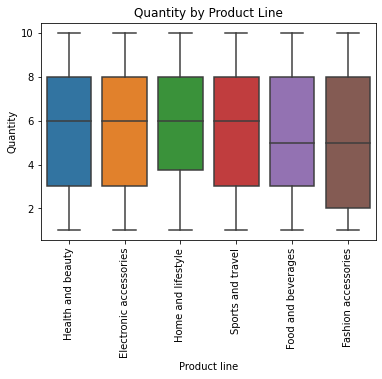

In [252]:
sns.boxplot(x="Product line", y = "Quantity" ,data=df).set_title("Quantity by Product Line")
plt.xticks(rotation=90)
plt.show()

<blockquote> 
    <ul>
        <li> Electronic accessories has a slight advantage in quantity ordered.</li>
        <li> Fashion accessories has the lowest quantity ordered.</li>
    </ul> 
</blockquote>

## Market Quality

<code>Which Product Line is highly rated?<code>

In [223]:
rating = df.groupby('Product line').mean()['Rating'].sort_values(ascending=False)
print(rating)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


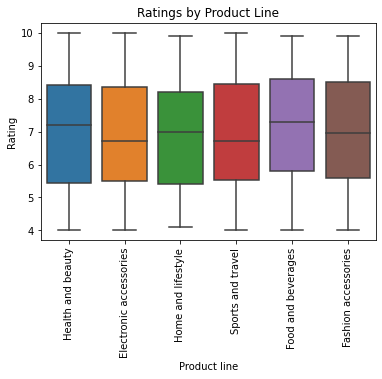

In [245]:
sns.boxplot(x="Product line", y = "Rating" ,data=df).set_title("Ratings by Product Line")
plt.xticks(rotation=90)
plt.show()

<code>Which Branch is highly rated?<code>

In [250]:
br_rating = df.groupby('Branch').mean()['Rating'].sort_values(ascending=False)
print(br_rating)

Branch
C    7.072866
A    7.027059
B    6.818072
Name: Rating, dtype: float64


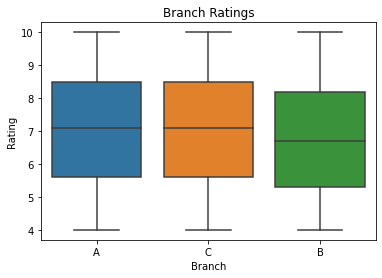

In [251]:
sns.boxplot(x="Branch", y = "Rating" ,data=df).set_title("Branch Ratings")
plt.xticks(rotation=0)
plt.show()

<blockquote> 
    <ul>
        <li> Home and lifestyle has the worst rating. To continue to grow their customer base, increase the ratings to market their product as reliable.</li>
        <li> Branch B is the lowest rated and should reassess customer satisfaction.</li>
    </ul> 
</blockquote>

## Average Price per Unit

<code> What are the Product Lines average Unit Price? <code>

In [224]:
product_up = df.groupby('Product line').mean()['Unit price'].sort_values(ascending=False)
print (product_up)

Product line
Fashion accessories       57.153652
Sports and travel         56.993253
Food and beverages        56.008851
Home and lifestyle        55.316937
Health and beauty         54.854474
Electronic accessories    53.551588
Name: Unit price, dtype: float64


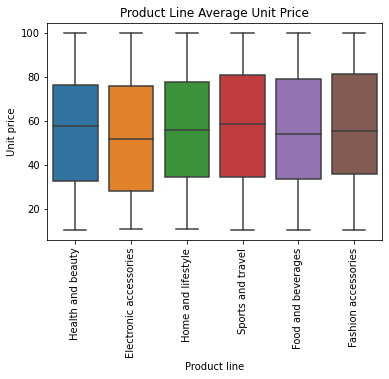

In [267]:
sns.boxplot(x="Product line", y = "Unit price" ,data=df).set_title("Product Line Average Unit Price")
plt.xticks(rotation=90)
plt.show()

<blockquote> 
    <ul>
        <li> Fashion accessories has the highest average unit price. The company should research alternative vendors or renegotiate their contract with the current vendor. </li>
        <li> Contrastingly, Electronic accessories has the lowest average unit price. </li>
    </ul> 
</blockquote>